<a href="https://colab.research.google.com/github/JerryKurata/First-NN-Tensorflow/blob/master/TF_Getting_Started_M5_Simple_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST-Fashion Neural Network

This notebook implements a simple NN consisting of two dense layers, and uses this network to classify MNIST-Fashion images.

These MNIST-Fashion images consist of clothing items from these  ten classes. (*T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)*

     |████████████████████████████████| 348.9MB 72kB/s 
     |████████████████████████████████| 3.1MB 36.0MB/s 
     |████████████████████████████████| 501kB 42.4MB/s 


## Import Libraries

We import TensorFlow, Numpy, and matplotlib libraries.  

Numpy is a powerful N-dimensional array library that
allows us to easily create and manipulate arrays of data, and more!

Numpy also allows us to convert TensorFlow's native data structures,
to python native data types.

matplotlib is a graphics plot library

In [0]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Problem Statement

Using example data, train a model that will correctly predict the class of images of fashion items.



## Get Data

In this example we will be using a truncated version of the Ames dataset that only contains information on homes sold in May 2010.

### About the Fashion MNIST dataset

The Fashion MNIST dataset is widely available data set.   It is documented at the https://github.com/zalandoresearch/fashion-mnist

Each image in the dataset is 28 X 28 pixels.  The pixel values are a grayscale with values ranging from 0 to 255.

Associated with each image is a number from 0 to 9 specifying the class of the fashion item in the image.  The values for the class are:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
|   1    | Trouser    | 
|  2     |  Pullover  |
|   3    |    Dress    |
|    4   |    Coat      |
|   5    | Sandal     |
|   6    | Shirt         |
|    7   |  Sneaker  |
|   8    |  Bag          |
|  9     | Ankle Boot |

There are 60,000 Training examples and 10,000 Testing examples. 

Fashion-MNIST is one of the dataset provided with Keras in Tensorflow.  Keras provides a load_data() method that will download the data sets of 60,000 Training images and their corresponding 60,000 labels, and 10,000 Test images and their corresponding 10,000 labels.

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Explore the data

Let's look at our data.

In [0]:
# Print the shape of the data tensors we loaded.  Should be:
#   60,000 training 28X28 images and their labels, and 10,000 testing images and their labels
print (train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Inspect data
Each image should have be 28 X 28 image and have a gray scale value of 0-255. Let's display an arbitrary image.

You should see:  
* A title that specifies the class of image, whose description is shown on the table above.
* The image 
* The 28 by 28 width and height pixel index 
* and on the right the gray associated with the specified pixel values.

In [0]:
def show_training_image(index):

  plt.figure()
  plt.title("Image Label = " + str(train_labels[index]))
  plt.imshow(train_images[index], cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
  plt.colorbar()
  plt.show()


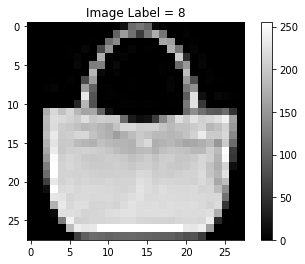

In [0]:
img_index = 100
show_training_image(img_index)

## Pre-process the data

As usually we need to do some pre-processing of the data.  Here we want to scale the pixels values from 0 to 255 to 0.0 to 1.0.  We need scale both the training and testing image values

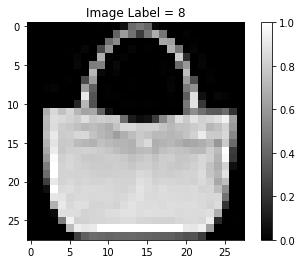

In [0]:
# scale training and testing image values
train_images = train_images / 255.0
test_images = test_images / 255.0
# Print the image again and notice the values now range from 0 to 1.
#   And the image looks the same, just on a different scale.
show_training_image(img_index)

## Create the model

We can now create the model we are going to train with the data.

This will be a simple model that:
* first flattens the 28 X 28 pixel values into a long stream of 28 by 28 = 784 pixel values - Note this is a Keras layer but is not a neural network layer.  
* Then passes each pixel value as the input to each of the 128 Neurons in the first Hidden layer
* and finally passes the last layer than contains 10 nuerons, one for each of the ten classes (t-shirt, pullover, etc).  Each of these nuerons uses the Softmax activation function to determine the probability that the image is each class.  The final output from the model is a vector of probabilites that the image of each class.  Such as :
[0.1, 0.05, 0.04, 0.06, 0.50, 0.20, 0.05, 0.05, 0.03, 0.07].  This example vector adds up to 1.0 and shows the probability that the image is class 0 (T-shirt/top) is 0.1 (10%), class 1 (Trousers) is 0.05 (5%), class 2 (Pullover) is 0.04 (4%), ....


In [0]:

model = tf.keras.models.Sequential()      # Create a new sequential model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # keras processing layer - no neurons
model.add(tf.keras.layers.Dense(128, activation='relu'))   # 128 nuerons connected to pixels
model.add(tf.keras.layers.Dense(10, activation='softmax')) # determine probability of each of the 10 classes


## Structure of the model

To make it easy for use to visualize the model, Keras models have a summary.  When we call it we see our model structure,  



In [0]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## Compile the model

Before we can train the model we need to  specify how the model will learn from the training data.  To do this we specify:
*  loss - how we measure loss (error).  We will use sparse_categorical_crossentropy, which measure how often the model incorrectly predicted the class.  We want this low.
*     optimizer - how the model will update the models' weights to reduce the loss
* metrics  - the metrics evaluate during training and testing



In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train the Model
Now that we have our data and model, and have specified how the model will learn from the data we can train it.

In [0]:
train_hist = model.fit(train_images, train_labels, epochs=100)

W0809 13:57:58.910664 140586074568576 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 112us/sample - loss: 0.5053 - accuracy: 0.8227
Epoch 2/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3790 - accuracy: 0.8625
Epoch 3/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3395 - accuracy: 0.8767
Epoch 4/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3155 - accuracy: 0.8849
Epoch 5/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2989 - accuracy: 0.8894
Epoch 6/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2823 - accuracy: 0.8958
Epoch 7/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2719 - accuracy: 0.8994
Epoch 8/100
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2599 - accuracy: 0.9043
Epoch 9/100
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2497 - accuracy: 0.90

Plot the training to makes sure it is convering.

In [0]:
def plot_acc(hist):
  # plot the accuracy
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()
  
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()



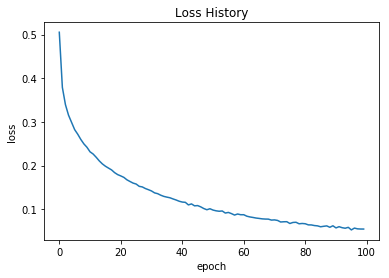

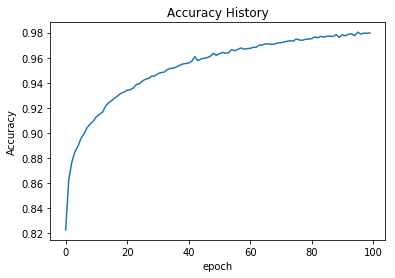

In [0]:
plot_loss(train_hist)
plot_acc(train_hist)

## Evaluate the Trained model on the test data

Once we have the model trained, we need to see how it will perform on data that it was not trained on, that is, test data. 

We do this with keras' evaluation function and the test dataset we retrieved earlier.


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [0]:
print("max training accuracy:", max(train_hist.history['accuracy']), "  test accuracy:", test_acc)

## Training Results

The model has over 98% accuracy on the training data.  And 88% accuracy on a test images on which it was not trained.  This is a classic sign that the model overfits the training data.  

We need to determine how we can reduce this overfitting and get **good accuracy on both training and test data!**


